In [1]:
#!pip install pandas matplotlib transformers torch scikit-learn nltk emoji umap-learn wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 39.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 40.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 37.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 65.0 MB/s e

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Sentimental Data

In [3]:
df = pd.read_csv('SentimentalDataset.csv', encoding = 'latin')

0 Indicating it is a Neutral Tweet/Comment
1 Indicating a Postive Sentiment
-1 Indicating a Negative Tweet/Comment

In [4]:
df['category'].unique()

array([-1.,  0.,  1., nan])

In [5]:
df = df[df['category'].notna()]

Text(0.5, 1.0, 'category')

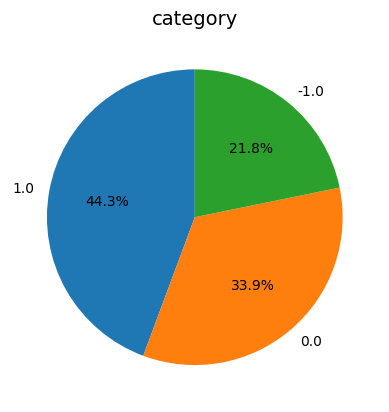

In [6]:
category_counts = df['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('category', fontsize=14)

In [7]:
percent_nan = df['category'].isnull().mean() * 100
print(percent_nan)

0.0


In [8]:
df['category'].fillna(df['category'].mode()[0])

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162973, dtype: float64

In [9]:
df['category'] = df['category'].astype(str).replace({
    '1.0': '1', '-1.0': '-1', '0.0': '0'
})
df.rename(columns={'category': 'sentiment_label' }, inplace=True)


In [10]:
print(df.isnull().sum())
df.dropna(subset=['clean_text'], inplace=True)

clean_text         4
sentiment_label    0
dtype: int64


In [11]:
print(df.isnull().sum())

clean_text         0
sentiment_label    0
dtype: int64


### HateSpeechData

In [12]:
df_HS = pd.read_csv('HateSpeechDataset.csv')

In [13]:
df_HS.drop(columns='Unnamed: 0', inplace=True)
df_HS.rename(columns={'Toxicity': 'hate_label'}, inplace=True)

In [14]:
df_HS['hate_label'].unique()

array([0, 1])

Text(0.5, 1.0, 'hate_label')

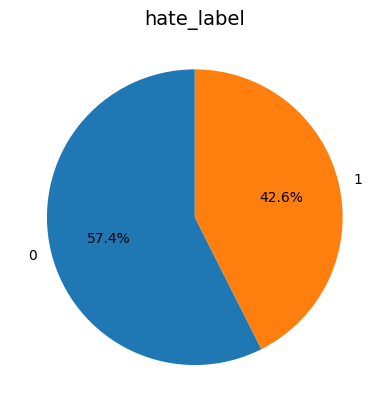

In [15]:
category_counts = df_HS['hate_label'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('hate_label', fontsize=14)

In [16]:
percent_nan = df_HS['tweet'].isnull().mean() * 100
print(percent_nan)

0.0


In [17]:
print(df_HS.isnull().sum())

hate_label    0
tweet         0
dtype: int64


### Data PreProcessing

In [18]:
import re
import emoji
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
def text_cleaning(text):
    text = unicodedata.normalize('NFKC', text) #normalise
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text) #remove url
    text = re.sub(r'@\w+', '', text) #remove mention
    text = re.sub(r'#', '', text) #remove hashtag
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #remove non meaningful text
    text = re.sub(r'[^\w\s]', '', text) #remove punctuation
    text = emoji.demojize(text) #remove emojis
    text = re.sub(r'(.)\1+', r'\1\1', text) #normalize elongated word
    text = re.sub(r'^RT[\s]+', '', text)
    return text

#function for tokenization, stopword removal, and lemmatization
def text_processing(tweet):
    # Simple tokenization using split()
    tokens = tweet.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [21]:
df['tweets'] = df['clean_text'].apply(text_cleaning)
df['tweets'] = df['tweets'].apply(text_processing)

In [22]:
df_HS['tweets'] = df_HS['tweet'].apply(text_cleaning)
df_HS['tweets'] = df_HS['tweets'].apply(text_processing)

In [23]:
df.drop(columns='clean_text', inplace=True)
df_HS.drop(columns='tweet', inplace=True)

In [24]:
print(df)

       sentiment_label                                             tweets
0                   -1  modi promised minimum government maximum gover...
1                    0             talk nonsense continue drama vote modi
2                    1  say vote modi welcome bjp told rahul main camp...
3                    1  asking supporter prefix chowkidar name modi gr...
4                    1  answer among powerful world leader today trump...
...                ...                                                ...
162975              -1  456 crore paid neerav modi recovered congress ...
162976              -1  dear rss terrorist payal gawar modi killing 10...
162977               0                       cover interaction forum left
162978               0  big project came india modi dream project happ...
162979               1  ever listen like gurukul discipline maintained...

[162969 rows x 2 columns]


In [25]:
df_HS

,hate_label,tweets
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
56740,1,yous muthafin lie 8220 right tl trash 8230 min...
56741,1,youve gone broke wrong heart baby drove rednec...
56742,1,young buck wanna eat dat nigguh like aint fuck...
56743,1,youu got wild bitch tellin lie


Model Building

In [26]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertModel
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import classification_report
import numpy as np
import torch.nn as nn


#### Approach: Multi-Dataset Multi-Task Learning
#### Key Steps:
1. Separate Datasets: Keep the sentiment dataset and hate speech dataset distinct.
2. Shared Model Layers: Use a single BERT model to extract features for both tasks.
3. Task-Specific Layers: Add separate classification heads for sentiment analysis and hate speech detection.
4. Alternate Training: Train the model alternately on both tasks in mini-batches

In [27]:
#Defining both Dataset

class HateSpeechDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.data = dataframe #raw dataset
        self.tokenizer = tokenizer #store bert tokens
        self.max_len = max_len # maximum sequnece length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        row = self.data.iloc[index]
        text = row['tweets']
        label = row['hate_label']

        #Tokenization
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.data = dataframe[dataframe['sentiment_label'].isin(['-1', '0', '1'])].copy()
        self.tokenizer = tokenizer
        self.max_len = max_len
        
        # Map string labels directly
        self.label_map = {
            '-1': 0,  # Negative
            '0': 1,   # Neutral
            '1': 2    # Positive
        }
        
        # Debug information
        print("Dataset Info:")
        print("Total samples:", len(self.data))
        print("Label distribution:", self.data['sentiment_label'].value_counts())
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        row = self.data.iloc[index]
        text = row['tweets']
        label = self.label_map[row['sentiment_label']]
            
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [28]:
# Tokenizer and datasets
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

hate_speech_dataset = HateSpeechDataset(df_HS, tokenizer, max_len=128)
sentiment_dataset = SentimentDataset(df, tokenizer, max_len=128)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Dataset Info:
Total samples: 162969
Label distribution: sentiment_label
1     72249
0     55211
-1    35509
Name: count, dtype: int64


In [29]:
#Define Data Loaders

from torch.utils.data import DataLoader, random_split

# Hate Speech DataLoader
train_size_hate = int(0.8 * len(hate_speech_dataset))
val_size_hate = len(hate_speech_dataset) - train_size_hate
train_hate, val_hate = random_split(hate_speech_dataset, [train_size_hate, val_size_hate])

train_loader_hate = DataLoader(train_hate, batch_size=16, shuffle=True)
val_loader_hate = DataLoader(val_hate, batch_size=16, shuffle=False)

# Sentiment DataLoader
train_size_sentiment = int(0.8 * len(sentiment_dataset))
val_size_sentiment = len(sentiment_dataset) - train_size_sentiment
train_sentiment, val_sentiment = random_split(sentiment_dataset, [train_size_sentiment, val_size_sentiment])

train_loader_sentiment = DataLoader(train_sentiment, batch_size=16, shuffle=True)
val_loader_sentiment = DataLoader(val_sentiment, batch_size=16, shuffle=False)


In [30]:
class MultiTaskModel(nn.Module):
    def __init__(self):
        super(MultiTaskModel, self).__init__()
        
        self.bert = BertModel.from_pretrained('bert-base-uncased')  # Load BERT
        self.hate_classifier = nn.Sequential(  # Hate speech binary classification
            nn.Dropout(0.3),                     
            nn.Linear(self.bert.config.hidden_size, 128),  # Hidden layer
            nn.ReLU(),                            
            nn.Linear(128, 2)  # Final layer for binary classification                  
        )  
        self.sentiment_classifier = nn.Sequential(  # Sentiment classification
            nn.Dropout(0.3),                     
            nn.Linear(self.bert.config.hidden_size, 128),  
            nn.ReLU(),                            
            nn.Linear(128, 3)  # Final layer for sentiment (3 classes)                  
        )  

    def forward(self, input_ids, attention_mask, task):
        # Pass through BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output  # Shape: (batch_size, hidden_size)
        
        # Task-specific classification
        if task == "hate":
            return self.hate_classifier(cls_output)
        elif task == "sentiment":
            return self.sentiment_classifier(cls_output)


In [31]:
#Training the Model Alternately
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MultiTaskModel().to(device)
optimizer = Adam(model.parameters(), lr=2e-5)
loss_fnc = CrossEntropyLoss()

def train_epoch(loader, task):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask, task)
        loss = loss_fnc(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(loader, task):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            
            logits = model(input_ids, attention_mask, task)
            predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    
    if task == 'sentiment':
        return classification_report(true_labels, predictions, target_names=['Negative', 'Neutral', 'Positive'])
    elif task == 'hate':
        return classification_report(true_labels, predictions, target_names=['Non-Hate', 'Hate'])


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
epochs = 15
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Train
    hate_loss = train_epoch(train_loader_hate, "hate")
    sentiment_loss = train_epoch(train_loader_sentiment, "sentiment")
    print(f"Hate Loss: {hate_loss:.4f}, Sentiment Loss: {sentiment_loss:.4f}")

    # Evaluate
    print("\nEvaluating Hate Speech Task:")
    hate_report = evaluate(val_loader_hate, "hate")
    print(hate_report)

    print("\nEvaluating Sentiment Task:")
    sentiment_report = evaluate(val_loader_sentiment, "sentiment")
    print(sentiment_report)


In [ ]:
epochs = range(1, 15 + 1)
hate_loss = [0.1793, 0.1241, 0.0796, 0.0544, 0.0353, 0.0253, 0.0195, 0.0173, 0.0146, 0.0131, 0.0122, 0.0110, 0.0108, 0.0114, 0.0097]
sentiment_loss = [0.3702, 0.2694, 0.2199, 0.1659, 0.1170, 0.0856, 0.0638, 0.0529, 0.0429, 0.0373, 0.0325, 0.0300, 0.0271, 0.0245, 0.0243]

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, hate_loss, marker='o', label='Hate Speech Loss')
plt.plot(epochs, sentiment_loss, marker='s', label='Sentiment Loss')

# Customizing the plot
plt.title('Loss Convergence Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(epochs, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import os

# Directory to save the model
save_directory = "multi_task_model"
os.makedirs(save_directory, exist_ok=True)

# Save the model state dictionary (weights)
torch.save(model.state_dict(), os.path.join(save_directory, "model_weights.pth"))

# Save the tokenizer (BERT tokenizer used)
tokenizer.save_pretrained(save_directory)

# Save the configuration and structure
with open(os.path.join(save_directory, "model_structure.pth"), "wb") as f:
    torch.save({
        'bert_config': model.bert.config,  # Save the BERT configuration
        'hate_classifier': model.hate_classifier.state_dict(),  # Save hate classifier
        'sentiment_classifier': model.sentiment_classifier.state_dict()  # Save sentiment classifier
    }, f)

print(f"Model saved to {save_directory}")

TopicModelling

In [35]:
def extract_embeddings_topic_modeling(dataset, model, task, batch_size=16, device='cuda'):
    """Generate embeddings from the pre-trained MultiTaskModel for topic modeling on GPU."""
    model.to(device)
    model.eval()
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    embeddings = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            # Forward pass through BERT
            outputs = model.bert(input_ids=input_ids, attention_mask=attention_mask)
            cls_embeddings = outputs.pooler_output  # Use pooled CLS token embeddings
            
            embeddings.append(cls_embeddings.cpu())  # Move to CPU after extraction
    
    return torch.cat(embeddings).numpy()



In [36]:
# Ensure the device is set to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Extract embeddings for topic modeling
hate_speech_embeddings = extract_embeddings_topic_modeling(hate_speech_dataset, model, task='hate', device=device)
sentiment_embeddings = extract_embeddings_topic_modeling(sentiment_dataset, model, task='sentiment', device=device)

In [37]:
from sklearn.cluster import KMeans

def cluster_embeddings(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    return labels, kmeans

# Cluster embeddings
hate_speech_labels, hate_speech_kmeans = cluster_embeddings(hate_speech_embeddings, n_clusters=5)
sentiment_labels, sentiment_kmeans = cluster_embeddings(sentiment_embeddings, n_clusters=7)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


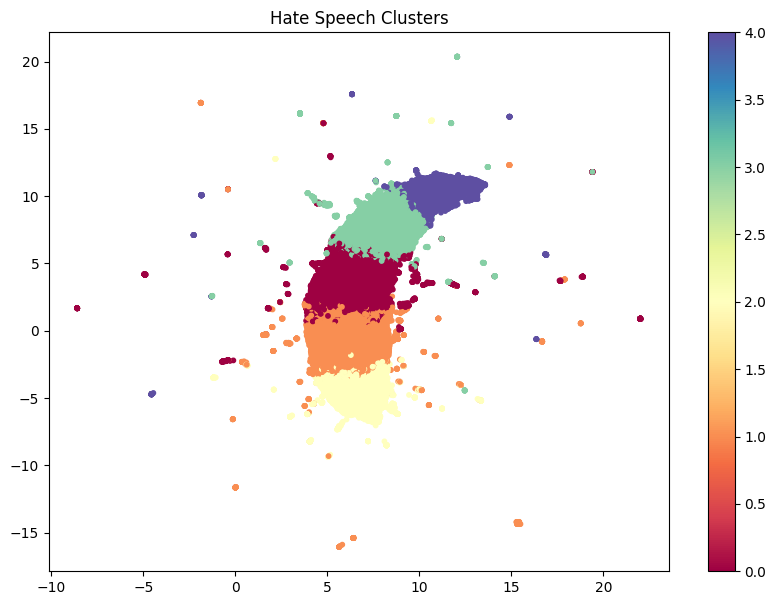

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


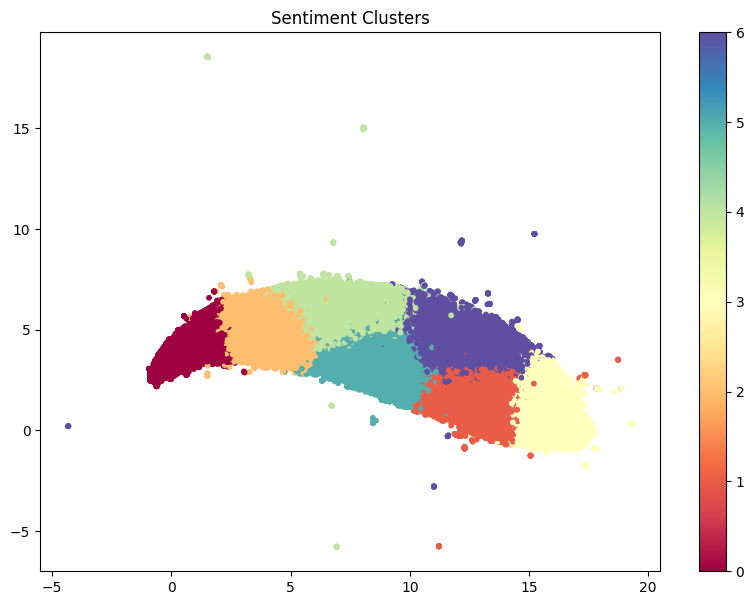

In [43]:
import umap.umap_ as umap

def visualize_clusters(embeddings, labels, title):
    """Visualize clusters using UMAP."""
    reducer = umap.UMAP(random_state=42)
    reduced_embeddings = reducer.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='Spectral', s=10)
    plt.colorbar()
    plt.title(title)
    plt.show()

# Visualize clusters
visualize_clusters(hate_speech_embeddings, hate_speech_labels, "Hate Speech Clusters")
visualize_clusters(sentiment_embeddings, sentiment_labels, "Sentiment Clusters")


In [46]:
# Reset index to ensure alignment
sentiment_dataset.data.reset_index(drop=True, inplace=True)
# Reset index for hate speech dataset
hate_speech_dataset.data.reset_index(drop=True, inplace=True)

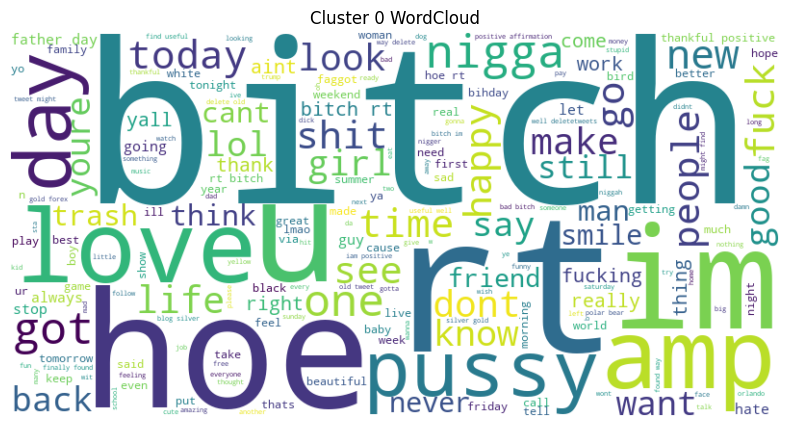

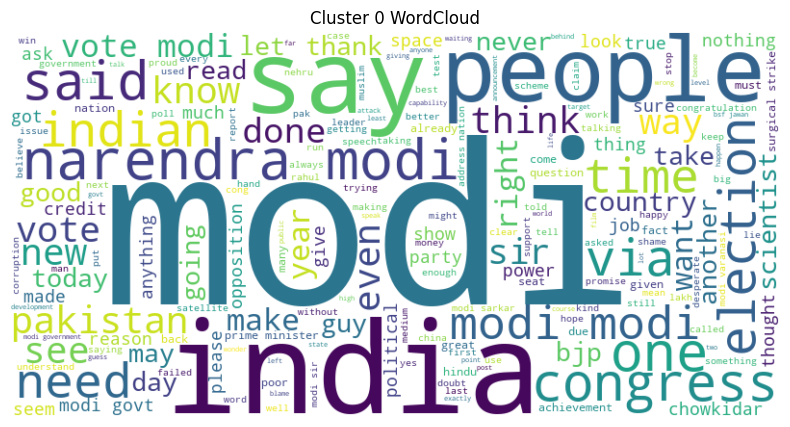

In [47]:
from wordcloud import WordCloud

def generate_wordcloud(texts, cluster_labels, cluster_id):
    """Generate a word cloud for a specific cluster."""
    cluster_texts = [texts[i] for i, label in enumerate(cluster_labels) if label == cluster_id]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cluster_texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster_id} WordCloud")
    plt.show()

# Example: Generate WordCloud for Hate Speech Cluster 0
generate_wordcloud(hate_speech_dataset.data['tweets'], hate_speech_labels, cluster_id=0)

# Example: Generate WordCloud for Sentiment Cluster 0
generate_wordcloud(sentiment_dataset.data['tweets'], sentiment_labels, cluster_id=0)